# Problema 4

Para este punto utilizaremos la ecuacion de cono generada por X^2/4+y^2/6-z^2/9=0

In [96]:
from scipy import stats
import numpy as np
import pandas as pd 
import math
import matplotlib.pyplot as plt
from random import seed
import random

In [86]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from mpl_toolkits import mplot3d

In [223]:
theta= np.linspace(0,2*np.pi,200)
random.shuffle(theta)
r= np.linspace(0,30,200)
random.shuffle(r)
x=r*1/2* np.cos(theta)  
y=r*1/2*np.sin(theta)
z=r*1/2

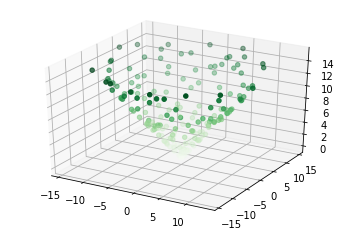

In [224]:
fig = plt.figure()
ax = plt.axes(projection='3d')
xdata = x
ydata = y
zdata = z
stride=2
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')
plt.show()


In [225]:
train  = pd.DataFrame(data={'x1': x,'y': y})

Construir una red neuronal

In [226]:
def nn_model():
    model = Sequential()
    model.add(Dense(20, activation='relu', input_shape=(train.shape[1],)))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(1))
    
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [230]:
model = nn_model()

In [231]:
resultados = model.fit( train,  z, validation_split=0.3, epochs=100, verbose=2)

Epoch 1/100
5/5 - 1s - loss: 76.4318 - mae: 7.5874 - val_loss: 85.5686 - val_mae: 7.8496
Epoch 2/100
5/5 - 0s - loss: 68.0535 - mae: 7.1445 - val_loss: 77.3585 - val_mae: 7.4529
Epoch 3/100
5/5 - 0s - loss: 61.7183 - mae: 6.8030 - val_loss: 70.3551 - val_mae: 7.0955
Epoch 4/100
5/5 - 0s - loss: 56.2836 - mae: 6.4890 - val_loss: 64.5534 - val_mae: 6.7816
Epoch 5/100
5/5 - 0s - loss: 51.6978 - mae: 6.2040 - val_loss: 59.3005 - val_mae: 6.4873
Epoch 6/100
5/5 - 0s - loss: 47.4082 - mae: 5.9316 - val_loss: 54.2818 - val_mae: 6.1925
Epoch 7/100
5/5 - 0s - loss: 43.2067 - mae: 5.6563 - val_loss: 48.9030 - val_mae: 5.8615
Epoch 8/100
5/5 - 0s - loss: 38.9118 - mae: 5.3587 - val_loss: 44.0468 - val_mae: 5.5466
Epoch 9/100
5/5 - 0s - loss: 34.9308 - mae: 5.0610 - val_loss: 39.4960 - val_mae: 5.2322
Epoch 10/100
5/5 - 0s - loss: 31.2197 - mae: 4.7712 - val_loss: 35.3608 - val_mae: 4.9285
Epoch 11/100
5/5 - 0s - loss: 27.7985 - mae: 4.4857 - val_loss: 31.1616 - val_mae: 4.6023
Epoch 12/100
5/5 - 

Epoch 94/100
5/5 - 0s - loss: 0.0067 - mae: 0.0629 - val_loss: 0.0055 - val_mae: 0.0535
Epoch 95/100
5/5 - 0s - loss: 0.0033 - mae: 0.0467 - val_loss: 0.0066 - val_mae: 0.0595
Epoch 96/100
5/5 - 0s - loss: 0.0023 - mae: 0.0366 - val_loss: 0.0075 - val_mae: 0.0635
Epoch 97/100
5/5 - 0s - loss: 0.0114 - mae: 0.0812 - val_loss: 0.0092 - val_mae: 0.0638
Epoch 98/100
5/5 - 0s - loss: 0.0044 - mae: 0.0526 - val_loss: 0.0153 - val_mae: 0.0912
Epoch 99/100
5/5 - 0s - loss: 0.0052 - mae: 0.0515 - val_loss: 0.0106 - val_mae: 0.0729
Epoch 100/100
5/5 - 0s - loss: 0.0091 - mae: 0.0741 - val_loss: 0.0083 - val_mae: 0.0659


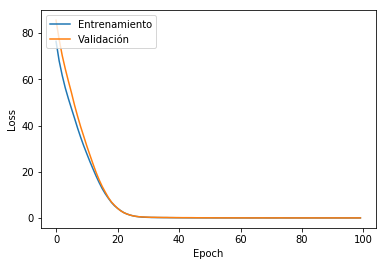

In [232]:
plt.plot(resultados.history['loss'])
plt.plot(resultados.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()


In [258]:
thetat= np.linspace(0,2*np.pi,4000)
random.shuffle(thetat)
rt= np.linspace(0,50,4000)
random.shuffle(rt)
xt=rt*1/2* np.cos(thetat)  
yt=rt*1/2*np.sin(thetat)
zt=rt*1/2
testx  = pd.DataFrame(data={'x1': xt,'y': yt})

In [259]:
test_mse_score, test_mae_score = model.evaluate(testx, zt)
test_mae_score

125/125 [==============================] - 0s 1ms/step - loss: 0.0192 - mae: 0.1020


0.10201433300971985

In [260]:
k = model.predict(testx)
Predict=[]
for sublist in k:
    for item in sublist:
        Predict.append(item)  
   




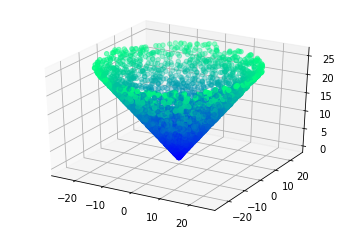

In [261]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(xt,yt, Predict, c=Predict, cmap='winter')
plt.show()

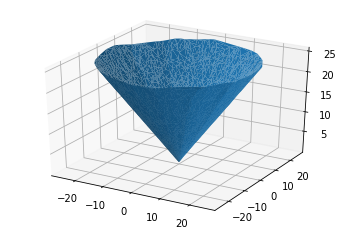

In [262]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_trisurf(xt, yt, Predict,  linewidth=0.2)
plt.show()